In [35]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np

# Set style for plots
plt.style.use('ggplot')
%matplotlib inline

# Define paths 
# Correct paths 
train_path = '/Users/kkxkaren/Desktop/ECS/ECS_171_project/seg_train'  
test_path = '/Users/kkxkaren/Desktop/ECS/ECS_171_project/seg_test'    
# Verify paths exist
if not os.path.exists(train_path):
    raise FileNotFoundError(f"Training folder not found at: {train_path}")
if not os.path.exists(test_path):
    raise FileNotFoundError(f"Test folder not found at: {test_path}")

# Get class names 
classes = sorted(os.listdir(train_path))
if '.DS_Store' in classes:
    classes.remove('.DS_Store')
print("Class names:", classes)


Class names: ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [36]:
# Count number of images in each class
train_counts = Counter()
test_counts = Counter()

for class_name in classes:
    class_folder = os.path.join(train_path, class_name)
    train_counts[class_name] = len([f for f in os.listdir(class_folder) if not f.startswith('.')])
    
    test_class_folder = os.path.join(test_path, class_name)
    test_counts[class_name] = len([f for f in os.listdir(test_class_folder) if not f.startswith('.')])

# Create DataFrame
count_df = pd.DataFrame({
    'Class': list(train_counts.keys()),
    'Train': list(train_counts.values()),
    'Test': list(test_counts.values())
})
count_df['Total'] = count_df['Train'] + count_df['Test']
count_df = count_df.sort_values('Total', ascending=False)

print("\nImage counts per class:")
display(count_df)


Image counts per class:


Class  Train  Test  Total
3   mountain   2512   525   3037
2    glacier   2404   553   2957
5     street   2382   501   2883
4        sea   2274   510   2784
1     forest   2271   474   2745
0  buildings   2191   437   2628

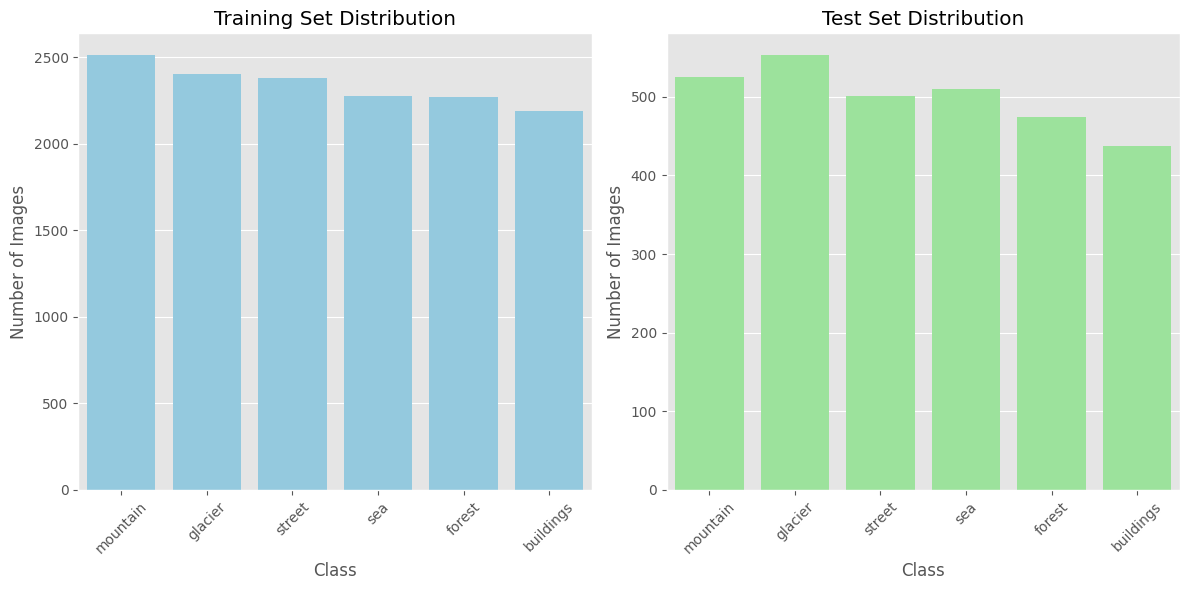

In [47]:
# Plot class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=count_df, x='Class', y='Train', color='skyblue')
plt.title('Training Set Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Images')

plt.subplot(1, 2, 2)
sns.barplot(data=count_df, x='Class', y='Test', color='lightgreen')
plt.title('Test Set Distribution')
plt.xticks(rotation=45)
plt.ylabel('Number of Images')

plt.tight_layout()
plt.show()



Sample training images:


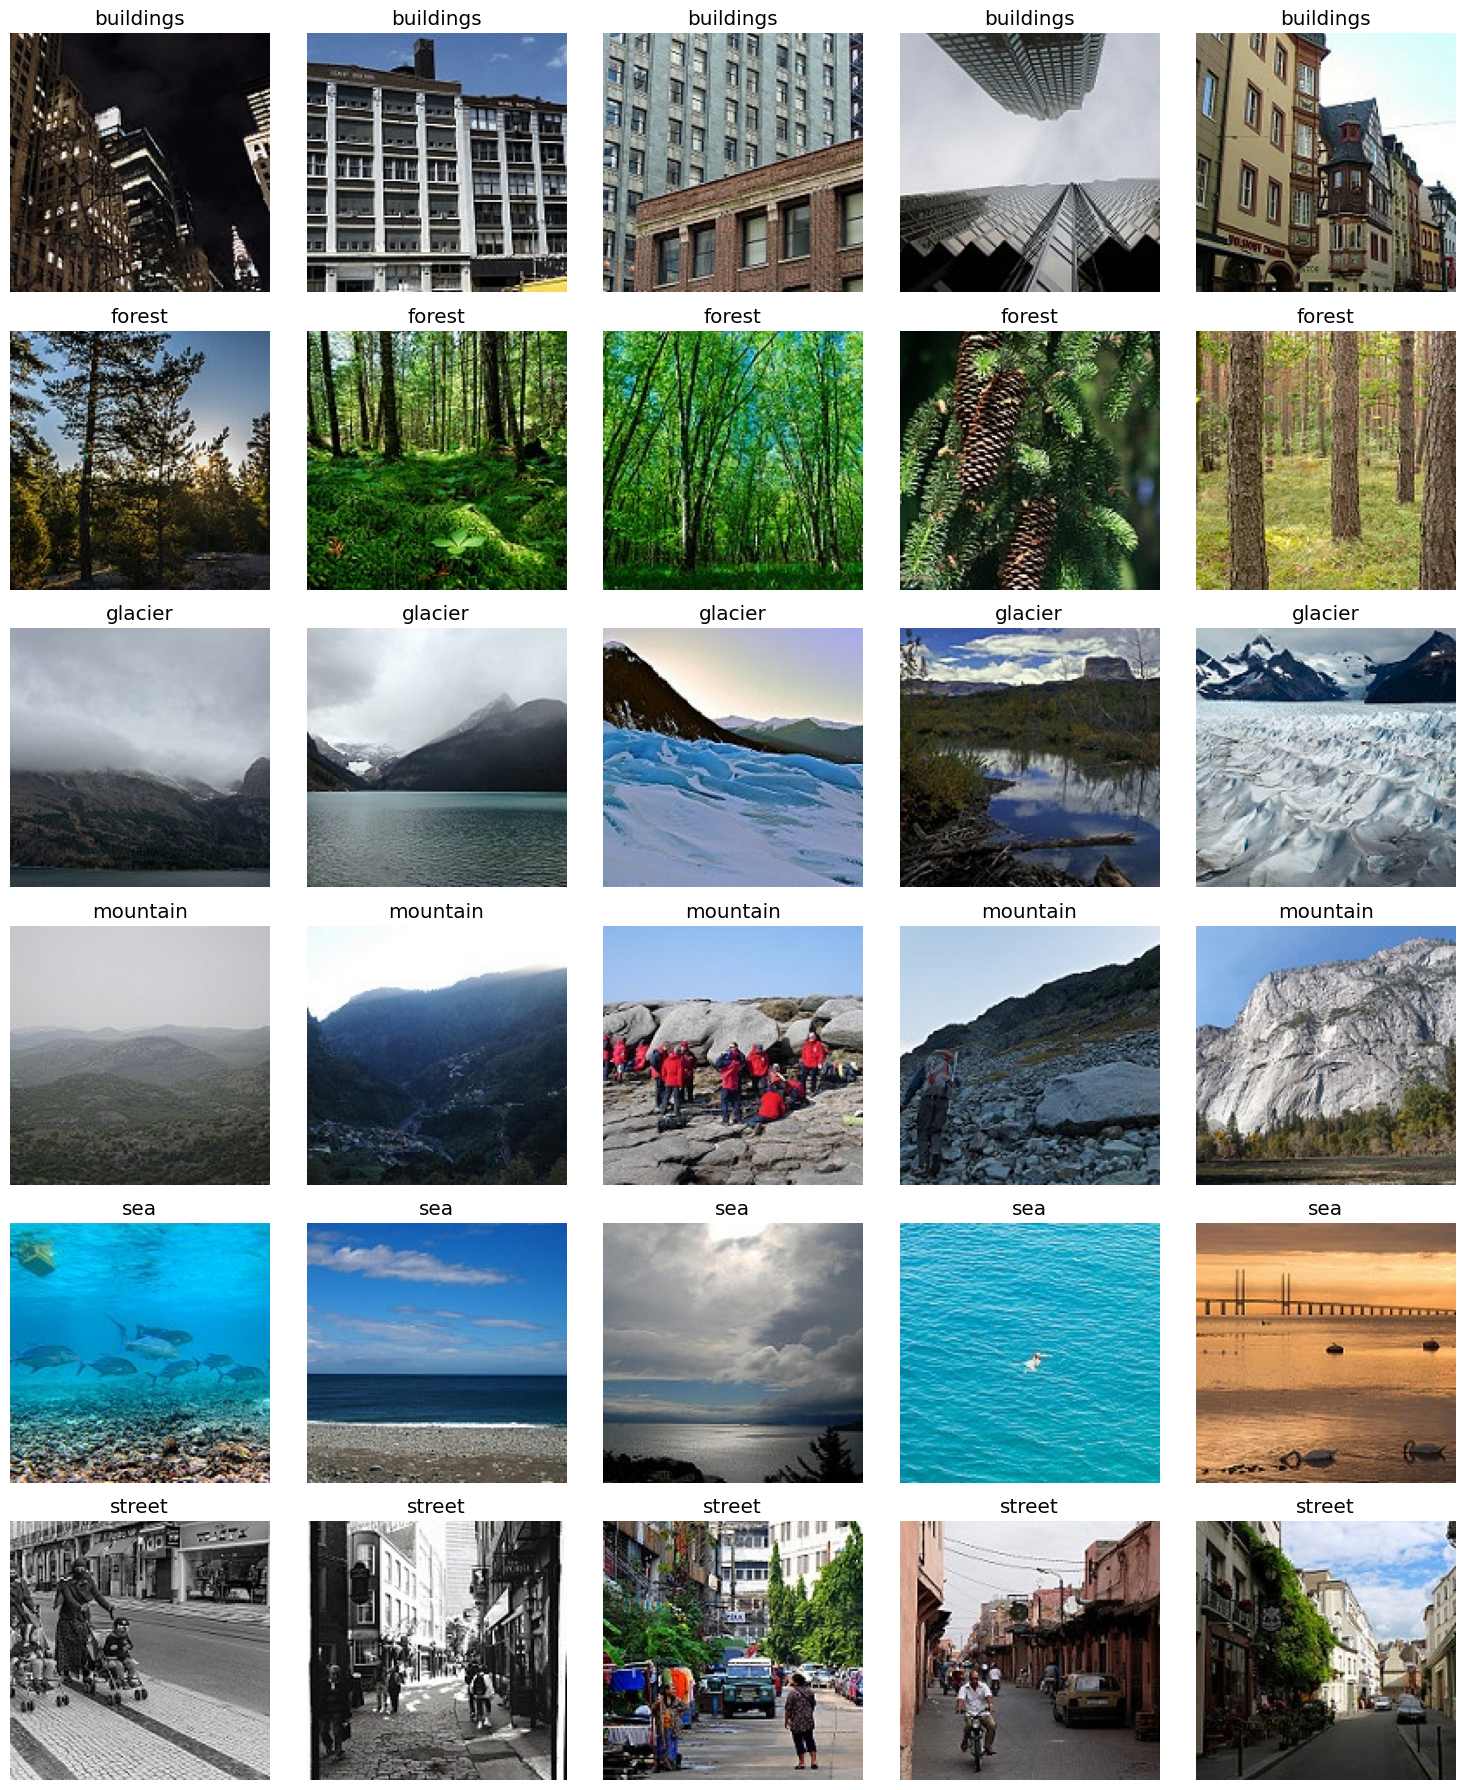

In [38]:
# Display sample images 
def plot_images(datasetPath, classes, samples_per_class=5):
    plt.figure(figsize=(15, len(classes)*3))
    for i, class_name in enumerate(classes):
        class_folder = os.path.join(datasetPath, class_name)
        image_files = [f for f in os.listdir(class_folder) if not f.startswith('.')][:samples_per_class]
        for j, image_name in enumerate(image_files):
            img_path = os.path.join(class_folder, image_name)
            image = Image.open(img_path)
            plt.subplot(len(classes), samples_per_class, i * samples_per_class + j + 1)
            plt.imshow(image)
            plt.title(class_name)
            plt.axis('off')
    plt.tight_layout()
    plt.show()

print("\nSample training images:")
plot_images(train_path, classes)

# Analyze image dimensions
def get_image_dimensions(dataset_path, sample_size=100):
    dimensions = []
    for class_name in classes:
        class_folder = os.path.join(dataset_path, class_name)
        image_files = [f for f in os.listdir(class_folder) if not f.startswith('.')][:sample_size]
        for image_name in image_files:
            try:
                with Image.open(os.path.join(class_folder, image_name)) as img:
                    dimensions.append(img.size)
            except Exception as e:
                print(f"Error processing {os.path.join(class_folder, image_name)}: {e}")
    return dimensions

train_dimensions = get_image_dimensions(train_path)
widths, heights = zip(*train_dimensions)


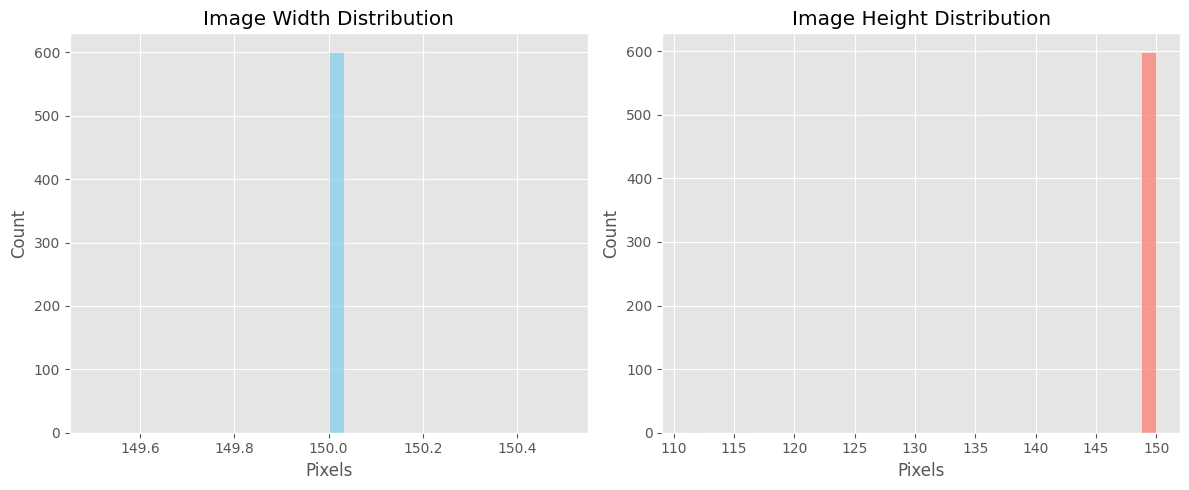

In [39]:
# Plot dimensions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=30, color='skyblue')
plt.title('Image Width Distribution')
plt.xlabel('Pixels')

plt.subplot(1, 2, 2)
sns.histplot(heights, bins=30, color='salmon')
plt.title('Image Height Distribution')
plt.xlabel('Pixels')

plt.tight_layout()
plt.show()

In [40]:
# Plot width vs height scatter
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title('Width vs Height of Images')
plt.xlabel('Width (pixels)')
plt.ylabel('Height (pixels)')
plt.plot([0, 2000], [0, 2000], 'r--')  # 1:1 aspect ratio line
plt.show()

In [41]:
# Summary statistics
print("\nImage Dimension Statistics:")
print(f"Average width: {np.mean(widths):.1f} ± {np.std(widths):.1f} pixels")
print(f"Average height: {np.mean(heights):.1f} ± {np.std(heights):.1f} pixels")
print(f"Minimum dimensions: {min(widths)}x{min(heights)}")
print(f"Maximum dimensions: {max(widths)}x{max(heights)}")


Image Dimension Statistics:
Average width: 150.0 ± 0.0 pixels
Average height: 149.9 ± 2.1 pixels
Minimum dimensions: 150x111
Maximum dimensions: 150x150


In [42]:
# Summary
print("\n" + "="*50)
print("EDA Summary:")
print(f"- Classes: {', '.join(classes)}")
print(f"- Total training images: {sum(train_counts.values())}")
print(f"- Total test images: {sum(test_counts.values())}")
print(f"- Average image dimensions: ~{np.mean(widths):.0f}x{np.mean(heights):.0f} pixels")
print("="*50)


EDA Summary:
- Classes: buildings, forest, glacier, mountain, sea, street
- Total training images: 14034
- Total test images: 3000
- Average image dimensions: ~150x150 pixels
